# Projeto da Disciplina de Teoria das Probabilidades
### Aluno: Davy Pedro e Guilherme Iram
### Professor: Roberto Quirino

## 1 - Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt

## 2 - Importando o dado

In [2]:
arquivo = 'TrabalhoTP.xlsx'

df = pd.read_excel(arquivo)

amplitude_classe = 4

df.head()

,Variavel1,Variavel2,Variavel3,variavel4,Variavel5
0,4.543088,1,52.529287,57.089488,25.111979
1,0.019913,2,49.138281,43.160850,27.392688
2,-2.348737,0,49.472011,48.341900,13.382138
3,0.105843,0,46.526167,48.526073,22.490899
4,-3.909062,0,53.195310,53.457285,10.351838


### 2.1 - Verificando valores únicos no dado

In [3]:
print(len(df["Variavel1"].unique()))
print(len(df["Variavel2"].unique()))
print(len(df["Variavel3"].unique()))
print(len(df["variavel4"].unique()))
print(len(df["Variavel5"].unique()))

500
5
495
496
500


In [4]:
print('A variável 2 tem um comportamento discreto. Desta forma, portanto, iremos analisá-la com mais rigor.')


df["Variavel2"].unique()

A variável 2 tem um comportamento discreto. Desta forma, portanto, iremos analisá-la com mais rigor.



array([1, 2, 0, 4, 3], dtype=int64)

## 3 - Distribuição de Frequências

In [5]:
tabela_de_frequencia = {}
frequencia = {}
classes = {}
numero_de_classes = 7

for column in df.columns:
    
    if column == "Variavel2":

        limite_max = df[column].max() + 1   
        limite_min = df[column].min()  

        amplitude_de_classe = 1
        classe = []

        for i in range(limite_max):
            classe.append(limite_min)
            limite_min += amplitude_de_classe

        classes[column] = classe
        
        n_elementos_por_classe = []
        n = 0
        
        for k in range(limite_max):

            for registro in df[column]:
                if classe[k] == registro:
                    n += 1

            n_elementos_por_classe.append(n)
            n = 0

        for i in range(len(classe)):
            frequencia[str(classe[i])] = n_elementos_por_classe[i]
        tabela_de_frequencia[column] = frequencia
        frequencia = {}
        
        continue
        
    limite_max = df[column].max() + (df[column].max() * 0.01)
    limite_min = df[column].min() + (df[column].min() * 0.01)
    
    amplitude_de_classe = (limite_max - limite_min) / numero_de_classes
    classe = []
    
    for i in range(numero_de_classes):
        classe.append([round(limite_min, 2), round(limite_min + amplitude_de_classe, 2)])
        limite_min += amplitude_de_classe
            
    classes[column] = classe
    
    n_elementos_por_classe = []
    n = 0
    for k in range(numero_de_classes):
        
        for registro in df[column]:
            if classe[k][0] <= registro < classe[k][1]:
                n += 1

        n_elementos_por_classe.append(n)
        n = 0
        
    for i in range(len(classe)):
        frequencia[str(classe[i])] = n_elementos_por_classe[i]
    tabela_de_frequencia[column] = frequencia
    frequencia = {}
    

lista_de_tabelas_frequencia = []
for coluna, frequencia in tabela_de_frequencia.items():
    tabela = pd.DataFrame({'Classes': frequencia.keys(),
                       'Frequência': frequencia.values()})
    
    tabela['Frequência Relativa'] =\
    tabela['Frequência']/tabela['Frequência'].sum()
    
    tabela['Frequência Absoluta'] =\
    [tabela['Frequência'][:k+1].sum() for k in range(len(tabela["Frequência"]))]
    
    lista_de_tabelas_frequencia.append(tabela)
    
for tabela in lista_de_tabelas_frequencia:
    print(tabela)
    print()

    

          Classes  Frequência  Frequência Relativa  Frequência Absoluta
0  [-9.66, -6.22]           5                0.010                    5
1  [-6.22, -2.77]          26                0.052                   31
2   [-2.77, 0.67]         202                0.404                  233
3    [0.67, 4.11]         173                0.346                  406
4    [4.11, 7.55]          74                0.148                  480
5    [7.55, 11.0]          16                0.032                  496
6   [11.0, 14.44]           4                0.008                  500

  Classes  Frequência  Frequência Relativa  Frequência Absoluta
0       0          38                0.076                   38
1       1         144                0.288                  182
2       2          90                0.180                  272
3       3         107                0.214                  379
4       4         121                0.242                  500

          Classes  Frequência  Frequên

## 4 - Visualização de cada variável

### 4.1 - Visualização Variável 1

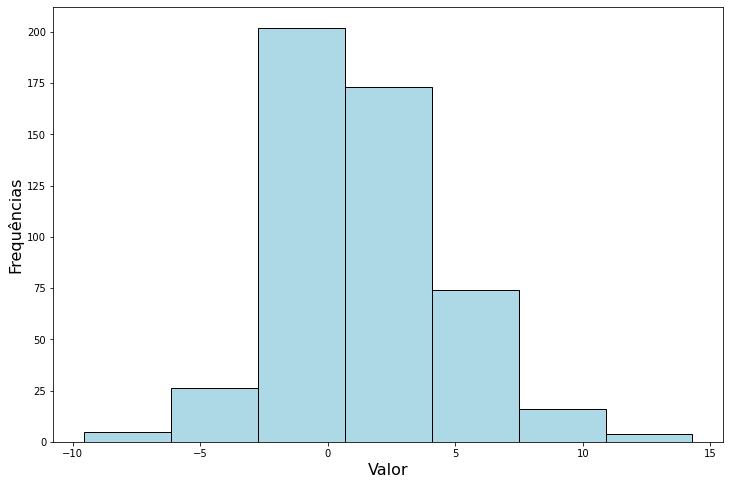

In [6]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(df['Variavel1'], bins=7, color='lightblue', edgecolor='black')
plt.xlabel("Valor", fontsize=16)
plt.ylabel("Frequências", fontsize=16)
#plt.title("Histograma Variável 1", fontsize=20)
plt.savefig("v1.png")
plt.show()

### 4.2 - Visualização Variável 2

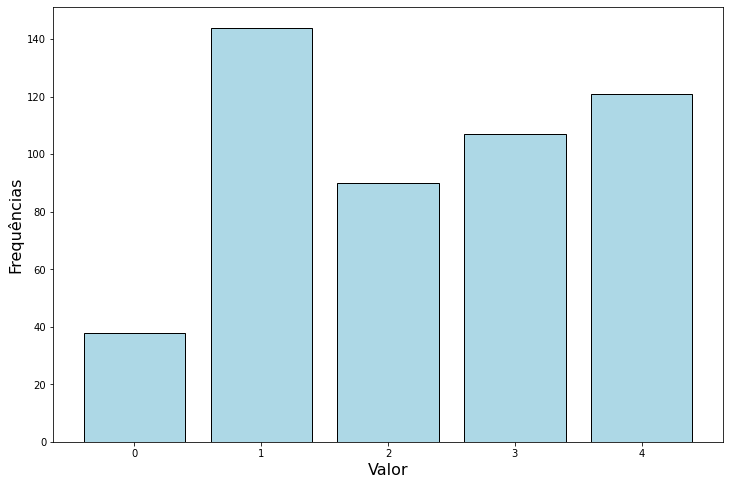

In [7]:
import matplotlib.pyplot as plt

label = [0, 1, 2, 3, 4]
data = [x for x in lista_de_tabelas_frequencia[1]["Frequência"]]

fig, ax = plt.subplots(figsize=(12,8))
plt.bar(label,data,color='lightblue', edgecolor='black')
plt.xlabel("Valor", fontsize=16)
plt.ylabel("Frequências", fontsize=16)
plt.savefig("v2.png")

plt.show()

### 4.3 - Visualização Variável 3

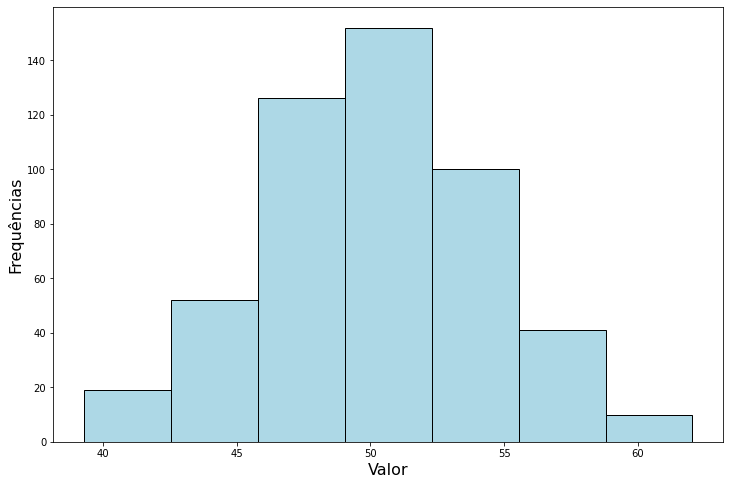

In [8]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(df['Variavel3'], bins=7, color='lightblue', edgecolor='black')
plt.xlabel("Valor", fontsize=16)
plt.ylabel("Frequências", fontsize=16)
#plt.title("Histograma Variável 3", fontsize=20)
plt.savefig("v3.png")

plt.show()

### 4.4 - Visualização Variável 4

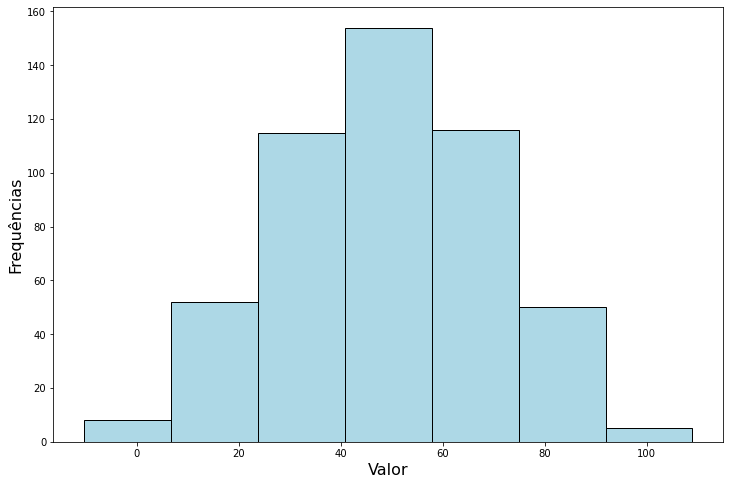

In [9]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(df['variavel4'], bins=7, color='lightblue', edgecolor='black')
plt.xlabel("Valor", fontsize=16)
plt.ylabel("Frequências", fontsize=16)
#plt.title("Histograma Variável 4", fontsize=20)
plt.savefig("v4.png")
plt.show()

### 4.5 - Visualização Variável 5

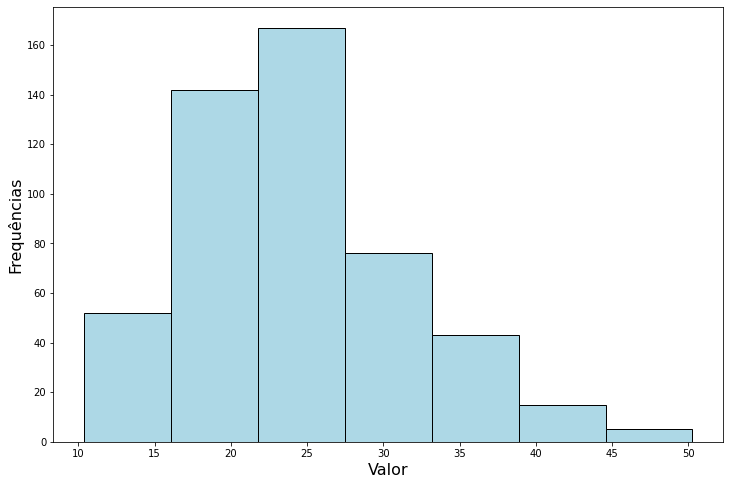

In [10]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(df['Variavel5'], bins=7, color='lightblue', edgecolor='black')
plt.xlabel("Valor", fontsize=16)
plt.ylabel("Frequências", fontsize=16)
#plt.title("Histograma Variável 5", fontsize=20)
plt.savefig("v5.png")
plt.show()

## 5 - Média, Mediana, Moda, Variância e Desvio Padrão

In [11]:
medidasCentralidade = {"media":{}, "mediana":{}, "moda":{}, "variancia": {},"desvio padrao": {}}

for column in df.columns:
    medidasCentralidade["media"][column] = df[column].mean()
    medidasCentralidade["mediana"][column] = df[column].median()
    medidasCentralidade["moda"][column] = st.mode(df[column])
    medidasCentralidade["variancia"][column] = df[column].var()
    medidasCentralidade["desvio padrao"][column] = df[column].std()
    medidasVariaveis = pd.DataFrame(
    medidasCentralidade
)

print(medidasVariaveis)

               media    mediana       moda   variancia  desvio padrao
Variavel1   1.547608   0.805357   4.543088    9.167826       3.027842
Variavel2   2.258000   2.000000   1.000000    1.710858       1.307998
Variavel3  50.168649  50.117825  52.714787   17.207513       4.148194
variavel4  48.952794  48.864917  15.775442  426.135379      20.643047
Variavel5  24.443726  23.647684  25.111979   50.535693       7.108846


## 6 - (1) Variância da População e (2) Desvio Padrão da População

In [12]:
from statistics import mode, pvariance, pstdev

df_v1 = df["Variavel1"]
df_v2 = df["Variavel2"]
df_v3 = df["Variavel3"]
df_v4 = df["variavel4"]
df_v5 = df["Variavel5"]

colunas = ['Variável', '1º Coeficiente', '2º Coeficiente']
v = []


for column in df.columns:
    
    As1 = (df[column].mean() - mode(df[column])) / pstdev(df[column])
    
    As2 = (3 * (df[column].mean() - df[column].median()))/pstdev(df[column])
    
    aux = [column, As1, As2]
    v.append(aux)

for i in v:
    print(i)

['Variavel1', -0.9903030220184977, 0.7361619855968878]
['Variavel2', 0.9627386873056955, 0.5923368394074788]
['Variavel3', -0.6144091157406222, 0.03679293025963343]
['variavel4', 1.6088022244530955, 0.012783773243854428]
['Variavel5', -0.09409724328781288, 0.3362736519218462]


## 7 - Boxplot

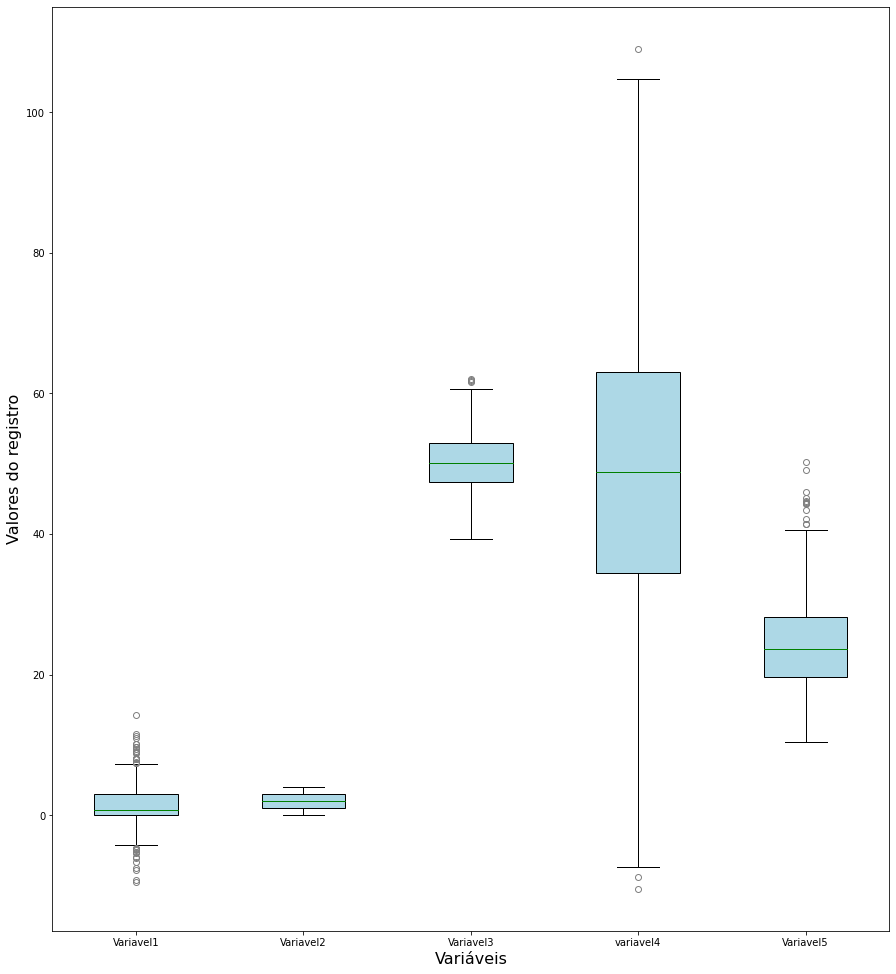

In [13]:
a = 'lightblue'
b = 'blue'
c = 'red'
d = 'grey'
e = 'black'
plt.figure(figsize=(15, 17))
plt.boxplot(df, vert = True, patch_artist = True, labels=df.columns, 
           boxprops=dict(facecolor=a, color=e),
            capprops=dict(color=e),
            whiskerprops=dict(color=e),
            flierprops=dict(color=d, markeredgecolor=d),
            medianprops=dict(color='green'),)
plt.ylabel('Valores do registro', fontsize = 16)
plt.xlabel('Variáveis', fontsize = 16)
plt.savefig("bp.png")
plt.show()

## 8 - Coef. Pearson

In [14]:
coefAssPerson = {"Pearson 1": {}, "Pearson 2": {}, "Simétria": {}}
for column in df.columns:
    As1 = (df[column].mean() - st.mode(df[column])) / st.stdev(df[column])
    As2 = (3 * (df[column].mean() - df[column].median())) / st.stdev(df[column])
    coefAssPerson["Pearson 1"][column] = As1
    coefAssPerson["Pearson 2"][column] = As2
    
    if As1 == As2 == 0:
        coefAssPerson["Simétria"][column] = "Simétrica"
    if  As2 > 0:
        coefAssPerson["Simétria"][column] = "Positiva"
    if  As2 < 0:
        coefAssPerson["Simétria"][column] = "Negativa"
    

In [15]:
pearson_df = pd.DataFrame(coefAssPerson)
print(pearson_df)

           Pearson 1  Pearson 2  Simétria
Variavel1  -0.989312   0.735425  Positiva
Variavel2   0.961775   0.591744  Positiva
Variavel3  -0.613794   0.036756  Positiva
variavel4   1.607193   0.012771  Positiva
Variavel5  -0.094003   0.335937  Positiva


In [17]:
k1 = (np.quantile(df["Variavel1"], .75) - np.quantile(df["Variavel1"], .25))\
/ (2 * (np.percentile(df["Variavel1"], 90) - np.percentile(df["Variavel1"], 10)))
k1

0.22495150237268874

In [18]:
np.percentile(df["Variavel1"], 90)

5.459179692775046

## 9 - Coef. Curtosis

In [19]:
coefCurtosis = {"Curtose": {}, "Classificação": {}}
for column in df.columns:
    
    ku = (np.quantile(df[column], .75) - np.quantile(df[column], .25))\
    / (2 * (np.percentile(df[column], 90) - np.percentile(df[column], 10)))
    coefCurtosis["Curtose"][column] = ku

    
    if ku == 0:
        coefCurtosis["Classificação"][column] = "Mesocúrtica"
    if ku > 0.263:
        coefCurtosis["Classificação"][column] = "Platicúrtica"
    if ku < 0.263:
        coefCurtosis["Classificação"][column] = "Leptocúrtica"

curtosis_df = pd.DataFrame(coefCurtosis)
print(curtosis_df)

            Curtose Classificação
Variavel1  0.224952  Leptocúrtica
Variavel2  0.333333  Platicúrtica
Variavel3  0.259121  Leptocúrtica
variavel4  0.262457  Leptocúrtica
Variavel5  0.235109  Leptocúrtica
